In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
class SimpleKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # 거리 계산
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        display(len(distances))
        
        # k개의 가장 가까운 이웃 찾기
        k_indices = np.argsort(distances)[:self.k]
        display(f'k_indices = {k_indices}')

        #
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        display(f'k_nearest_labels = {k_nearest_labels}')
        
        # 가장 흔한 클래스 찾기
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        display(f'set(k_nearest_labels) = {set(k_nearest_labels)}')
        display(f'k_nearest_labels.count = {k_nearest_labels.count}')
        display(f'most_common = {most_common}')

        #
        return most_common


In [3]:
# 예제 데이터 (아이리스 데이터셋)
iris = datasets.load_iris()
X, y = iris.data, iris.target

display(X.shape)
display(y.shape)

(150, 4)

(150,)

In [4]:
# KNN 모델 생성 및 학습
knn = SimpleKNN(k=3)
knn.fit(X, y)

In [5]:
X_test = [X[50], X[100]]  # 예시 데이터 포인트
display(X_test)

[array([7. , 3.2, 4.7, 1.4]), array([6.3, 3.3, 6. , 2.5])]

In [6]:
# 테스트 데이터 예측
predictions = knn.predict(X_test)
print("Predictions:", predictions)

150

'k_indices = [50 52 86]'

'k_nearest_labels = [1, 1, 1]'

'set(k_nearest_labels) = {1}'

'k_nearest_labels.count = <built-in method count of list object at 0x000001A6FE3C2C40>'

'most_common = 1'

150

'k_indices = [100 136 144]'

'k_nearest_labels = [2, 2, 2]'

'set(k_nearest_labels) = {2}'

'k_nearest_labels.count = <built-in method count of list object at 0x000001A6FE3A4640>'

'most_common = 2'

Predictions: [1 2]


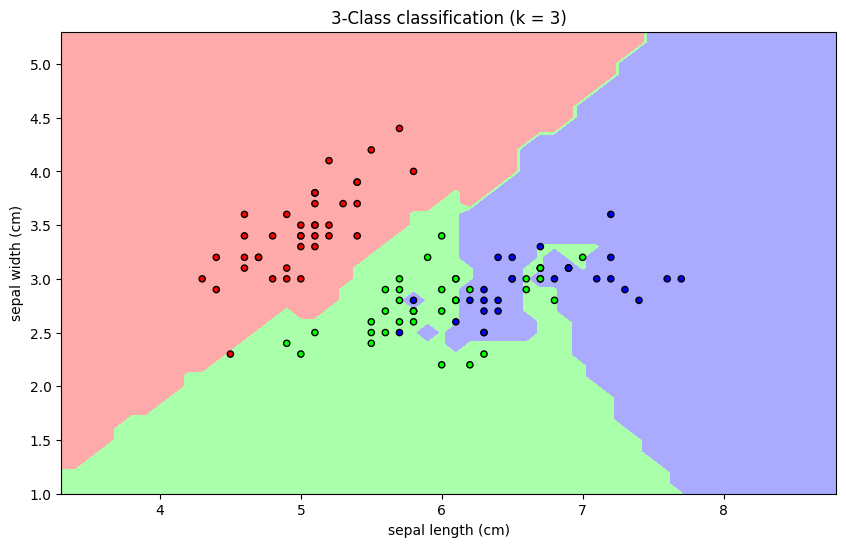

In [7]:
# 아이리스 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특징만 사용 (시각화를 위해)
y = iris.target

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# K-NN 모델 생성 및 학습
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 시각화를 위한 설정
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 그리드 포인트에 대한 예측
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 색상 맵
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 결정 경계 그리기
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# 훈련 데이터 포인트 플로팅
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = {k})")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

